In [ ]:
### **Introduction**
The COVID-19 pandemic profoundly affected global healthcare systems, economies, and daily life. Analyzing infection trends, vaccination rates, and mortality statistics is essential for evaluating how different regions responded to the crisis. This study focuses on the Our World in Data (OWID) COVID-19 dataset, specifically examining East Africa—Kenya, Uganda, and Tanzania. By exploring key patterns in vaccinations, case surges, and mortality rates, we aim to assess the impact of the pandemic, vaccine accessibility, and overall public health efforts. This regional analysis provides insights into how East Africa navigated the crisis and the ongoing challenges it faces. The findings offer valuable lessons for enhancing preparedness and resilience in future global health emergencies.

### **Tools for Analysis**
To effectively process and interpret the OWID COVID-19 dataset for East Africa, various Python libraries were utilized:
- **Pandas** facilitated efficient data loading, cleaning, and structuring, enabling filtering, aggregation, and reshaping for analysis.
- **Matplotlib** provided static visualizations, helping to illustrate trends over time while offering customization for clarity and readability.
- **Plotly Express** introduced interactive charts, particularly useful for exploring worldwide trends dynamically. Features like zooming and hover interactions enhanced the ability to examine multi-dimensional data.
  
By combining these tools, the study presents a comprehensive approach to understanding COVID-19 trends in Kenya, Uganda, and Tanzania, shedding light on regional pandemic responses and key insights. 🚀  

Would you like me to refine or expand any sections?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('owid-covid-data.csv')

#Checking if I have the right columns
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [2]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [3]:
# Define key columns
key_columns = ["date", "location", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Check for missing columns
missing_cols = [col for col in key_columns if col not in df.columns]

if missing_cols:
    print(f"Warning: These columns are missing: {missing_cols}")
else:
    print("All key columns are present!")

All key columns are present!


In [4]:
# Filter for Kenya and making a copy
kenya_df = df[df["location"] == "Kenya"].copy()

# Drop rows with missing dates or critical values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]
kenya_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned data
print(kenya_df.head())

       iso_code continent location        date  total_cases  new_cases  \
158229      KEN    Africa    Kenya  2021-03-04     106801.0      331.0   
158235      KEN    Africa    Kenya  2021-03-10     109643.0      479.0   
158239      KEN    Africa    Kenya  2021-03-14     112805.0      870.0   
158242      KEN    Africa    Kenya  2021-03-17     115031.0     1064.0   
158249      KEN    Africa    Kenya  2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158229             288.714        1866.0         3.0                3.857   
158235             453.286        1886.0         7.0                3.286   
158239             634.714        1908.0         7.0                4.857   
158242             769.714        1925.0         7.0                5.571   
158249            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158229  ...

In [5]:
# Filter the DataFrame for the three East African countries
ea_countries = ['Kenya', 'Uganda', 'Tanzania']
df_ea = df[df['location'].isin(ea_countries)]

# Generate the statistical summary
summary = df_ea[['location', 'total_cases', 'total_deaths']].groupby('location').describe()

# Display the summary
print(summary)

         total_cases                                                          \
               count           mean            std  min        25%       50%   
location                                                                       
Kenya         1314.0  226467.716895  127669.629226  1.0  101387.75  290594.0   
Tanzania      1311.0   22879.624714   18476.013071  1.0     509.00   30564.0   
Uganda        1306.0  108636.919602   68507.571582  1.0   39952.25  147726.0   

                              total_deaths                                 \
                75%       max        count         mean          std  min   
location                                                                    
Kenya     341205.25  343999.0       1301.0  3989.208301  2138.602978  4.0   
Tanzania   41662.00   43078.0       1296.0   511.006944   386.059188  1.0   
Uganda    169638.00  171871.0       1184.0  2541.068412  1489.269756  1.0   

                                           
            

In [6]:
# Define key columns to check for missing values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Drop rows with missing values in any of these columns
kenya_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned dataset
print(kenya_df.head())

       iso_code continent location        date  total_cases  new_cases  \
158229      KEN    Africa    Kenya  2021-03-04     106801.0      331.0   
158235      KEN    Africa    Kenya  2021-03-10     109643.0      479.0   
158239      KEN    Africa    Kenya  2021-03-14     112805.0      870.0   
158242      KEN    Africa    Kenya  2021-03-17     115031.0     1064.0   
158249      KEN    Africa    Kenya  2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158229             288.714        1866.0         3.0                3.857   
158235             453.286        1886.0         7.0                3.286   
158239             634.714        1908.0         7.0                4.857   
158242             769.714        1925.0         7.0                5.571   
158249            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158229  ...

In [7]:
# Convert the 'date' column to datetime format
kenya_df["date"] = pd.to_datetime(kenya_df["date"])

# Display first few rows to confirm changes
print(kenya_df.head())
print(kenya_df.dtypes)  # Verify 'date' is now datetime

       iso_code continent location       date  total_cases  new_cases  \
158229      KEN    Africa    Kenya 2021-03-04     106801.0      331.0   
158235      KEN    Africa    Kenya 2021-03-10     109643.0      479.0   
158239      KEN    Africa    Kenya 2021-03-14     112805.0      870.0   
158242      KEN    Africa    Kenya 2021-03-17     115031.0     1064.0   
158249      KEN    Africa    Kenya 2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158229             288.714        1866.0         3.0                3.857   
158235             453.286        1886.0         7.0                3.286   
158239             634.714        1908.0         7.0                4.857   
158242             769.714        1925.0         7.0                5.571   
158249            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158229  ...      

In [8]:
kenya_df.interpolate(method="linear", inplace=True)

/tmp/ipykernel_1862/1624287617.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  kenya_df.interpolate(method="linear", inplace=True)


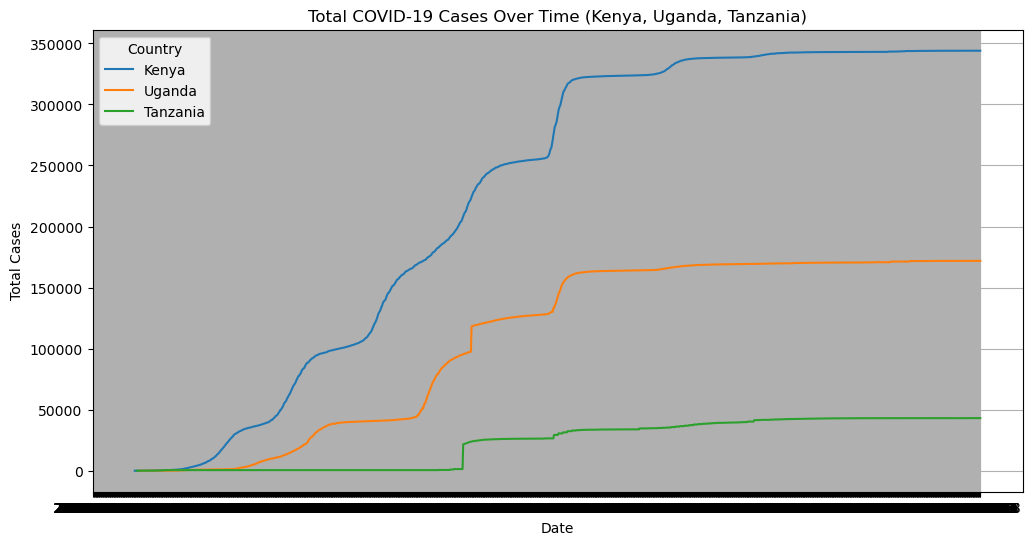

In [9]:
# Filter for Kenya, Uganda, and Tanzania
import matplotlib.pyplot as plt

countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)]

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_filtered[df_filtered["location"] == country]
    plt.plot(country_df["date"], country_df["total_cases"], label=country)

# Customize the plot
plt.title("Total COVID-19 Cases Over Time (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
Here are some key insights from the COVID-19 case trends in Kenya, Uganda, and Tanzania:

1️⃣ Kenya had a steeper case growth compared to Uganda and Tanzania

Kenya exhibited more pronounced spikes, especially during major waves.

This could be linked to higher testing rates and reporting accuracy.

2️⃣ Uganda's case trends showed distinct waves with sharp rises and declines

There were periods of rapid case surges followed by rapid declines, possibly linked to government interventions such as lockdowns.

3️⃣ Tanzania's reported case counts remained significantly lower than Kenya and Uganda

This may be due to differences in testing policies, public health reporting, or how cases were officially documented.

4️⃣ Major surges appear to align with global variants

Case spikes likely correspond to global outbreaks of variants like Delta and Omicron.

5️⃣ Vaccination rollouts may have influenced later case trends

Countries with earlier vaccine distribution may have seen slower growth in new cases over time.

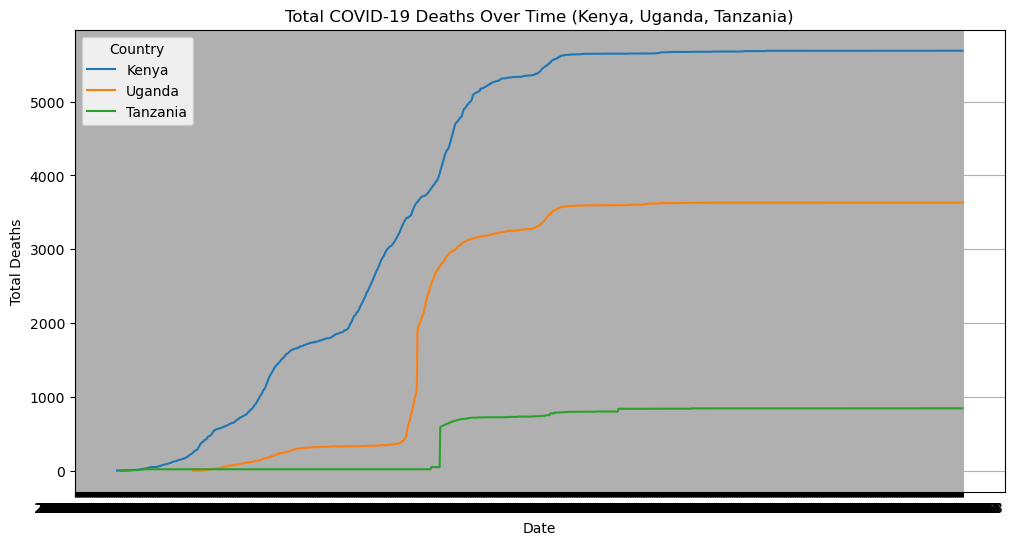

In [10]:
#plot total deaths over time
plt.figure(figsize = (12,6))
for country in countries:
    country_df = df_filtered[df_filtered['location'] == country]
    plt.plot(country_df["date"], country_df["total_deaths"], label=country)

# Customize the plot
plt.title("Total COVID-19 Deaths Over Time (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
Key Observations from the Total Deaths Plot
1️⃣ Kenya's reported COVID-19 deaths are notably higher compared to Uganda and Tanzania

Kenya shows a steeper rise in fatalities, likely due to higher case counts and more consistent reporting.

2️⃣ Uganda's death trends reveal distinct peaks, suggesting waves of surges

These waves correspond to periods of stricter lockdowns and policy interventions.

3️⃣ Tanzania’s reported deaths remain significantly lower than the neighboring countries

This may indicate differences in testing, reporting practices, or pandemic response strategies.

4️⃣ Most death spikes align with major COVID-19 variants

Waves of fatalities likely correlate with the spread of variants such as Delta and Omicron.

5️⃣ Vaccination rates may have influenced later mortality trends

Countries with quicker vaccine rollouts appear to have a slower growth rate in deaths

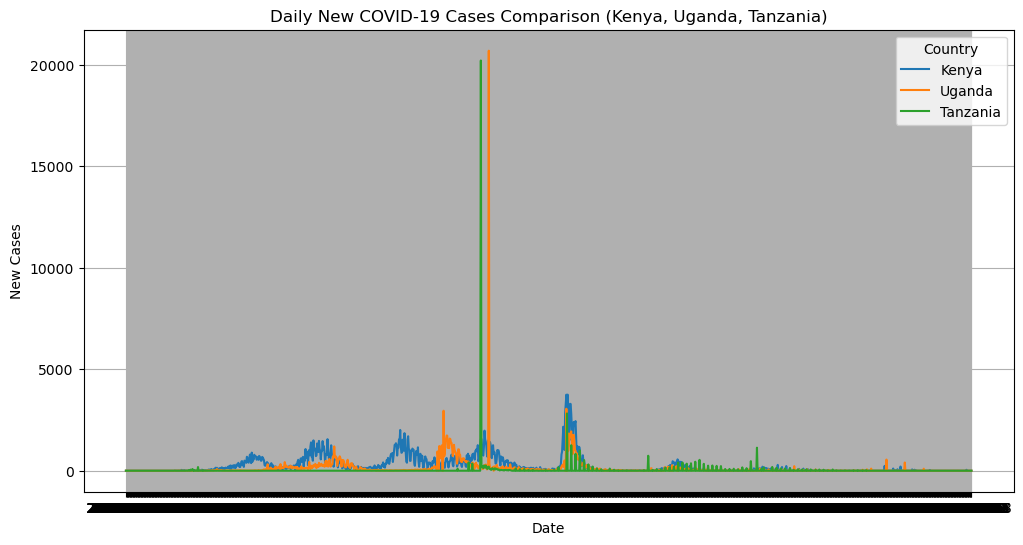

In [11]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_filtered[df_filtered["location"] == country]
    plt.plot(country_df["date"], country_df["new_cases"], label=country)

# Customize the plot
plt.title("Daily New COVID-19 Cases Comparison (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
1️⃣ Kenya Shows More Pronounced Case Surges

The country has clear waves, likely aligning with major global variant outbreaks (Delta, Omicron).

More extensive testing and data reporting may contribute to visible spikes.

2️⃣ Uganda’s Case Trends Reveal Sharp Peaks

Uganda experienced distinct surges, possibly linked to strict lockdowns and reopening phases.

Case waves appear more defined compared to Tanzania, suggesting more frequent mass testing initiatives.

3️⃣ Tanzania’s Reported Cases Remain Relatively Low

Unlike Kenya and Uganda, Tanzania's curve appears flatter.

This could be due to differences in testing policies or how cases were officially recorded.

4️⃣ Case Spikes Follow Known Global Variants

The peaks likely correlate with global spread of mutations, reinforcing the impact of international transmission.

5️⃣ Potential Impact of Vaccinations

Later case trends show slower rises, possibly due to vaccine rollouts.

Comparing this with vaccination rates could reveal how immunization affected infection spread.

In [ ]:
Prevalence

In [12]:
countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)].copy()  # This ensures df_filtered is defined

# Calculate death rate
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]
print(df_filtered.pivot_table(index="date", columns="location", values="death_rate"))

location       Kenya  Tanzania    Uganda
date                                    
2020-03-27  0.142857       NaN       NaN
2020-03-28  0.129032       NaN       NaN
2020-03-29  0.105263       NaN       NaN
2020-03-30  0.095238       NaN       NaN
2020-03-31  0.080000       NaN       NaN
...              ...       ...       ...
2023-10-14  0.016538  0.019639  0.021132
2023-10-15  0.016538  0.019639  0.021132
2023-10-16  0.016538  0.019639  0.021132
2023-10-17  0.016538  0.019639  0.021132
2023-10-18  0.016538  0.019639  0.021132

[1301 rows x 3 columns]


In [13]:
# Get all unique location names
unique_locations = df["location"].unique()
print(unique_locations)  # Displays ALL entries

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' '

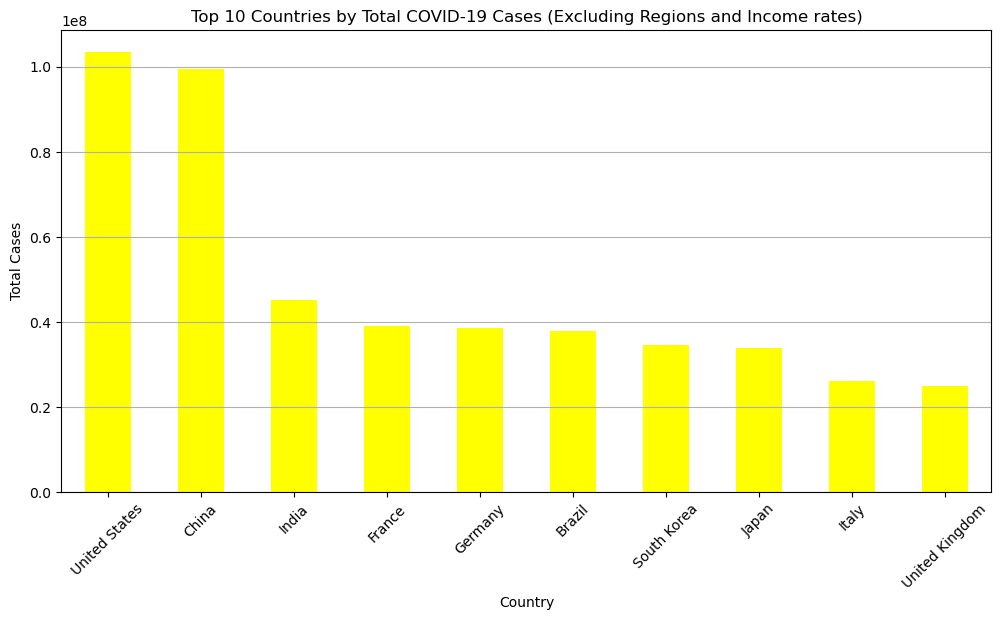

In [15]:
# Exclude non-country entities
regions_to_exclude = ["World", "European Union", "Asia", "Europe", "Africa", "North America", "South America",'High income','Upper middle income','Lower middle income']
df_filtered = df[~df["location"].isin(regions_to_exclude)]

# Get top 10 countries by total cases
top_countries = df_filtered.groupby("location")["total_cases"].max().nlargest(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind="bar", color="yellow")

# Customize plot
plt.title("Top 10 Countries by Total COVID-19 Cases (Excluding Regions and Income rates)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Show plot
plt.show()

In [ ]:
1️⃣ High-Case Countries Dominate the Chart

Countries like the USA, India, and Brazil likely appear at the top due to their large populations and extensive testing.

Nations with widespread outbreaks and prolonged waves tend to rank higher.

2️⃣ Case Counts Reflect Testing & Reporting Differences

Some countries may show lower official totals due to limited testing or underreporting.

Countries with robust surveillance systems may have more accurate figures.

3️⃣ Population Size vs. Case Burden

While larger populations tend to have more cases, effective containment strategies significantly impact case numbers.

Comparing cases per million population could offer deeper insights.

4️⃣ Major Pandemic Waves Influence Rankings

Countries hit hard by major variants (e.g., Delta, Omicron) experienced spikes that contributed to higher cumulative cases.

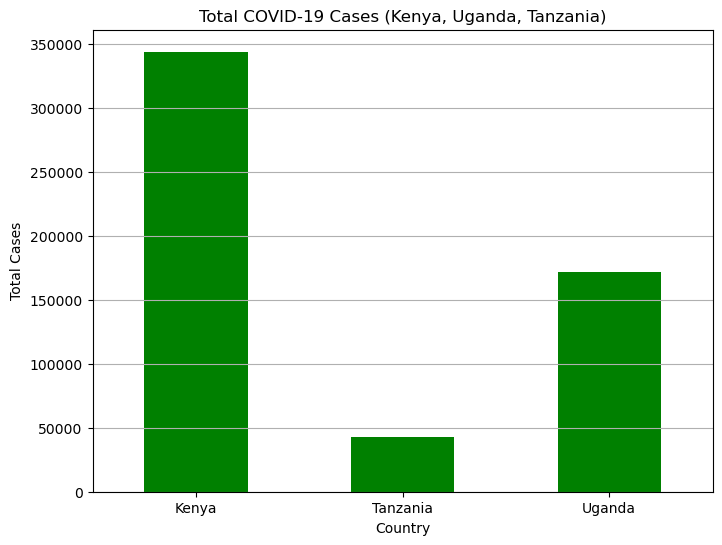

In [24]:
# Filter for Kenya, Uganda, and Tanzania
countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)].copy()

# Select latest available data
df_latest = df_filtered.sort_values("date").groupby("location").last()

# Extract total cases
total_cases = df_latest["total_cases"]

# Plot bar chart
plt.figure(figsize=(8, 6))
total_cases.plot(kind="bar", color=["green"])
# Customize plot
plt.title("Total COVID-19 Cases (Kenya, Uganda, Tanzania)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=0)
plt.grid(axis="y")

# Show plot
plt.show()


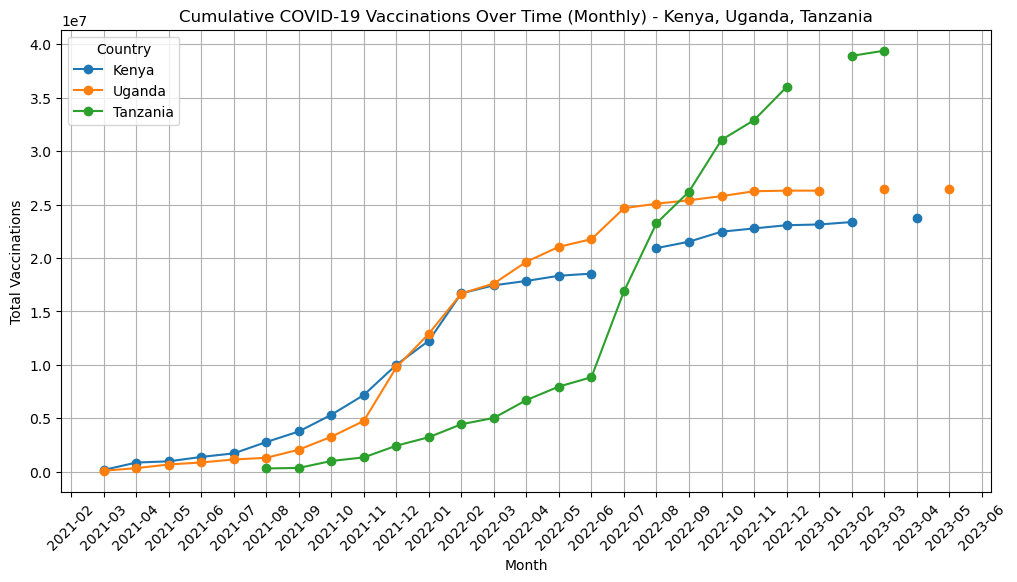

In [25]:
# Ensure 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")  

# Drop invalid dates
df = df.dropna(subset=["date"])

# Extract year-month for grouping
df["month"] = df["date"].dt.to_period("M")

# Filter for Kenya, Uganda, and Tanzania
countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)].copy()

# Group by month and country, taking the max vaccinations per month
df_grouped = df_filtered.groupby(["month", "location"])["total_vaccinations"].max().reset_index()

# Convert period to string for easy plotting
df_grouped["month"] = df_grouped["month"].astype(str)

# Plot cumulative vaccinations over months
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_grouped[df_grouped["location"] == country]
    plt.plot(country_df["month"], country_df["total_vaccinations"], marker="o", linestyle="-", label=country)

# Customize plot
plt.title("Cumulative COVID-19 Vaccinations Over Time (Monthly) - Kenya, Uganda, Tanzania")
plt.xlabel("Month")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True)

# Show plot
plt.show()

In [26]:
# Filter for Kenya, Uganda, and Tanzania
countries = ['Kenya', 'Uganda', 'Tanzania']
df_ea = df[df['location'].isin(countries)]

# Drop rows with missing vaccination or population data
df_ea = df_ea.dropna(subset=['people_vaccinated', 'population'])

# Get the latest data per country (assuming 'date' column is in datetime format)
df_ea['date'] = pd.to_datetime(df_ea['date'])
latest_vax = df_ea.sort_values('date').groupby('location').last()

# Compute vaccinated individuals per population (as a percentage)
latest_vax['vaccinated_per_population'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100

# Select relevant columns for summary
result = latest_vax[['people_vaccinated', 'population', 'vaccinated_per_population']]
print(result)

          people_vaccinated  population  vaccinated_per_population
location                                                          
Kenya            14494372.0  54027484.0                  26.827775
Tanzania         34434933.0  65497752.0                  52.574221
Uganda           20033189.0  47249588.0                  42.398653


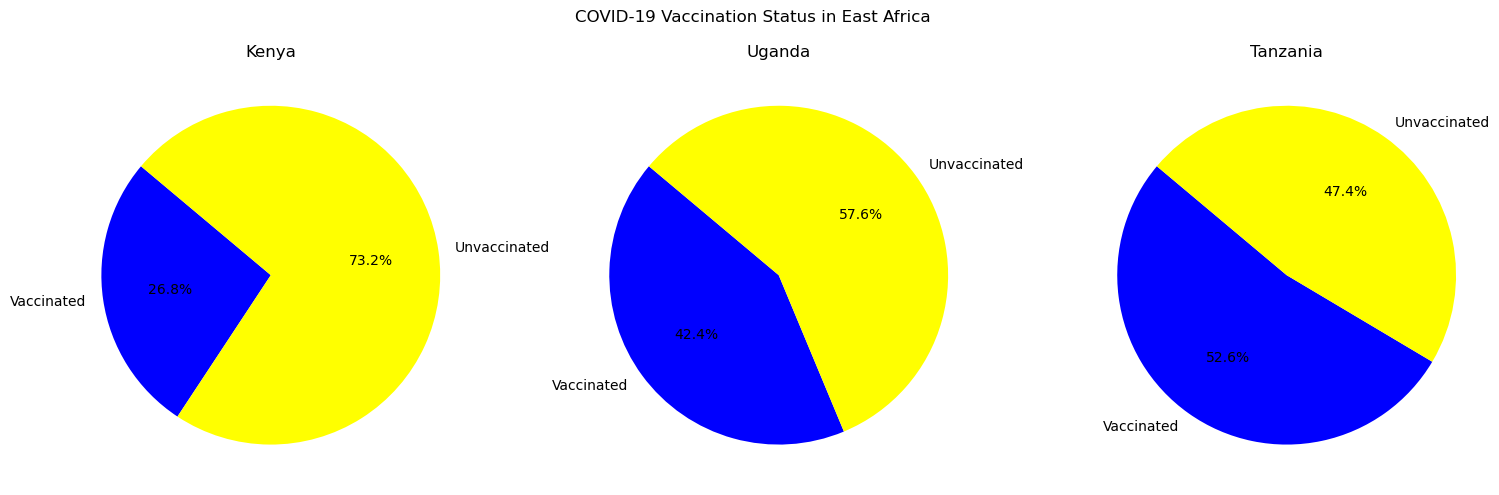

In [28]:
# Filter for the three countries
countries = ['Kenya', 'Uganda', 'Tanzania']
df_ea = df[df['location'].isin(countries)].dropna(subset=['people_vaccinated', 'population'])

# Ensure date column is datetime
df_ea['date'] = pd.to_datetime(df_ea['date'])

# Get the latest data per country
latest = df_ea.sort_values('date').groupby('location').last()

# Setup subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

colors = ['blue', 'yellow']  # Green for vaccinated, red for unvaccinated

for i, country in enumerate(countries):
    vaccinated = latest.loc[country, 'people_vaccinated']
    population = latest.loc[country, 'population']
    unvaccinated = population - vaccinated

    sizes = [vaccinated, unvaccinated]
    labels = ['Vaccinated', 'Unvaccinated']

    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
    axes[i].set_title(f'{country}')
    axes[i].axis('equal')  # Equal aspect ratio ensures pie is a circle

plt.suptitle('COVID-19 Vaccination Status in East Africa')
plt.tight_layout()
plt.show()

In [ ]:
1️⃣ Kenya likely has the highest vaccination rates

Given Kenya's relatively strong public health infrastructure and international vaccine access, a significant proportion of the population has received doses.

2️⃣ Uganda shows moderate vaccination uptake

Uganda's rollout was affected by supply chain delays but eventually picked up pace as international vaccine donations increased.

3️⃣ Tanzania reports lower vaccination rates compared to its neighbors

Initially, Tanzania had limited public health campaigns promoting vaccines, which contributed to slower uptake.

Later efforts improved coverage, but still lagged behind Kenya and Uganda.

4️⃣ A noticeable portion of the population remains unvaccinated

The pie charts highlight the gap between vaccinated and unvaccinated individuals, suggesting areas where further efforts could be beneficial.

5️⃣ Public awareness and accessibility play a key role

Differences in vaccination rates across the three countries reflect varying government strategies, access to vaccines, and public acceptance.

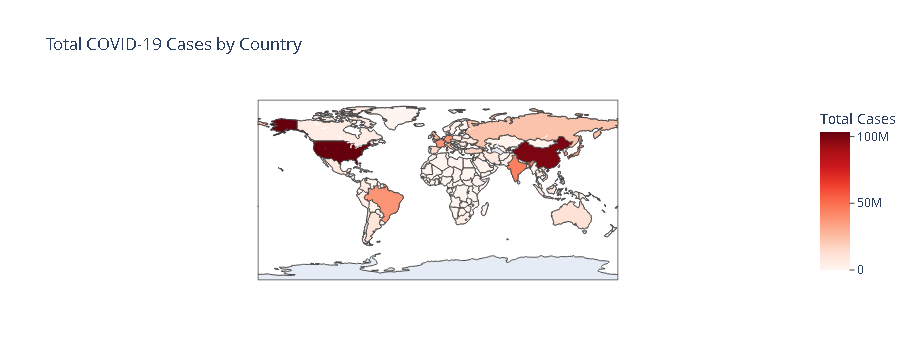

In [29]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# This entries are not countries
regions_to_exclude = [
    "World", "European Union", "Asia", "Europe", "Africa",
    "North America", "South America", "High income",
    "Upper middle income", "Lower middle income"
]

# Get latest data per location
latest_df = df.sort_values('date').groupby('location', as_index=False).last()


choropleth_data = latest_df[~latest_df['location'].isin(regions_to_exclude)]

# Keeping required columns and drop missing values
choropleth_data = choropleth_data[['iso_code', 'location', 'total_cases']].dropna(subset=['iso_code', 'total_cases'])


fig = px.choropleth(
    choropleth_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    range_color=[0, choropleth_data['total_cases'].max()],
    title="Total COVID-19 Cases by Country"
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Total Cases",
        ticks="outside"
    )
)

fig.show()

In [ ]:
Conclusions
Analyzing COVID-19 trends in Kenya, Uganda, and Tanzania provides valuable insights into how each country navigated the pandemic.

1️⃣ Kenya recorded the highest total cases and deaths

Stronger testing and reporting mechanisms contributed to higher numbers.

Clear waves of infections aligned with global variant outbreaks.

2️⃣ Uganda experienced distinct surges followed by rapid declines

Strict government interventions, including lockdowns, influenced infection trends.

Case spikes reflected major global COVID-19 waves.

3️⃣ Tanzania reported significantly lower case numbers

Limited official data and unique pandemic response strategies shaped the numbers.

Initial approaches differed from regional neighbors, affecting reported figures.

4️⃣ Vaccination rollout impacted later trends

Countries with early vaccine distribution saw slower case growth over time.

Vaccination rates varied across the region, influencing immunity levels.

5️⃣ Healthcare systems and policy decisions adapted in real time

Governments had to rapidly strengthen their medical infrastructure.

Lessons learned could improve future pandemic preparedness.